<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

Regression deals with finding an appropriate function mapping from the input variables (independednt variables) to the output variable (dependent variable) from the available data points. The aim is to obtain a regression function that minimizes the appropriate cost function, and further that it belongs to the constrained class of regression functions. 

##Linear Regression

Regression where the class of regression functions are restricted to linear or affine functions. Linear regression is one of the easiest and simplest forms of regression.

##System Model
For sample index $i$, let  $x_i = (x_{i1}, x_{i2}, \ldots,x_{iK})^T \in \mathcal{R^n}$ denote the values for input variables, and let $y_i \in \mathcal{R}$ denote the value for the output variable.

Let $N$ denote the total number of training samples. 

Let $\hat{y} := \theta^Tx$ denote the linear regression, where $\theta$ denotes the regression coefficients.



Text(0.5, 0.92, 'The affine plane $y = \\theta_1x_1 + \\theta_2x_2+b$\n The red points corresponds to noisy observations')

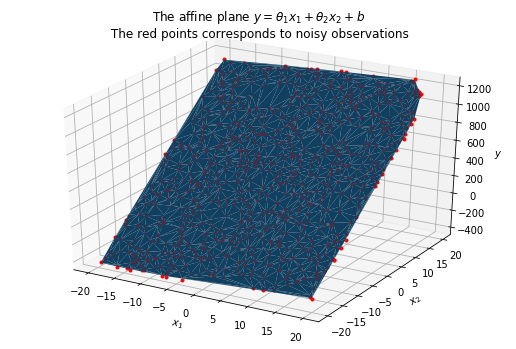

In [207]:
# Let us generate synthetic data points assuming a two-dimensional input variable and an affine map between the input variable and the output variable.
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mean_squared_error(output_var,input_var,theta):
  error = output_var-np.matmul(input_var,theta)
  return (np.linalg.norm(error)**2)/np.size(error)

num_samples = 1000;
noise_var = 100; #variance of additive Gaussian noise added to the output.
theta_true = np.array([[3.2, 40.1, 400]]).transpose() # the third element corresponds to the constant component.
input_var_range = 20 # the range of input variables will be from [-input_var_range, input_var_range]
#print(theta)

x = np.random.rand(num_samples,2)*2*input_var_range - input_var_range # generate uniformly distributed random input points
x1 = np.concatenate((x, np.ones((num_samples,1),dtype=x.dtype)), axis=1) # append all ones column to x. This is required to estimate the bias

y = np.matmul(x1,theta_true) # noiseless linear output
noise_samples =  math.sqrt(noise_var)*np.random.randn(num_samples,1) #generate noise samples
y1 = y + noise_samples # add noise samples to the output

#print(y[1:5])
#print(y1[1:5])

plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d') #initialize a 3D-plot

ax.plot_trisurf(x1[:,0], x1[:,1], y[:,0]) #plot the affine-plane using the noise-less output
ax.plot(x1[:,0], x1[:,1], y1[:,0],'.r')   #plot the noisy samples

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.title('The affine plane ' r'$y = \theta_1x_1 + \theta_2x_2+b$' '\n The red points corresponds to noisy observations')

##Least Squares

Least squares solution, or the regression coefficients, ($\theta^*$) is defined as $$ \theta^* = \arg \min_\theta \sum_i^N \Vert y_i -  \theta^Tx_i\Vert^2$$

The least square solution can be derived to be the product of Moore-Penrose pseudo inverse of $X$ and $y$

$$\theta^* = (X^TX)^{-1}X^Ty,$$

where $X =  \begin{bmatrix} x_1^T  \\ x_2^T\\\vdots\\ x_n^T \end{bmatrix}$

In [208]:
temp = np.linalg.inv(np.matmul(x1.transpose(),x1)) #compute inv(X^T*X)
pinv_x1 = np.matmul(temp,x1.transpose()) # compute the pseudo inverse of x1. try the inbulit pseudo inverse function available in numpy
theta_LS = np.matmul(pinv_x1,y1)
print("LS solution = ",theta_LS)
print("The mean squared error = ", mean_squared_error(y1,x1,theta_LS))


LS solution =  [[  3.1765976 ]
 [ 40.06611376]
 [399.82369628]]
The mean squared error =  109.92919221595302


##Gradient Descent based optimization

The least squares solution is the optimum solution that minimizes the squared error. However, finding the pseudo inverse can be computationally intensive due to the need to find a matrix inverse, especially when the number of features are large. An alternative approach is to iteratively arrive at the optimum solution via gradient descent. 

Let $\theta$ denote the current regression coefficients. The empirical mean squared error is given by

$$\bar{e}^2(\theta) := \frac{1}{N}\sum_{i=1}^N (y_i-\theta^Tx_i)^2$$

The partial derivative with respect to $\theta_j$ is 
$$\frac{\partial \bar{e}^2(\theta)}{\partial \theta_j} = \frac{1}{N}\sum_{i=1}^N 2*(y_i-\theta^Tx_i) (-x_{ij}).$$

The gradient can then be written as  $$\nabla_\theta(\bar{e}^2(\theta)) = -\frac{2}{N} X^T(y-X\theta)$$

##Batch gradient descent
In batch gradient descent, we descent in the direction opposite to the gradient descent calculated as computed above. The resulting update rule for iteration $n+1$ is 
$$\theta_{n+1} = \theta_n -\mu_n \nabla_\theta(\bar{e}^2(\theta_n)),$$
where $\mu_n$ is known as the learning rate or stepsize at iteration $n$ of the update rule, and $\bar{e}^2(\theta_n)$ denotes the mean squared error associated with the regression coefficients $\theta_n$.



mean of norm of x1 =  15.064973879438691


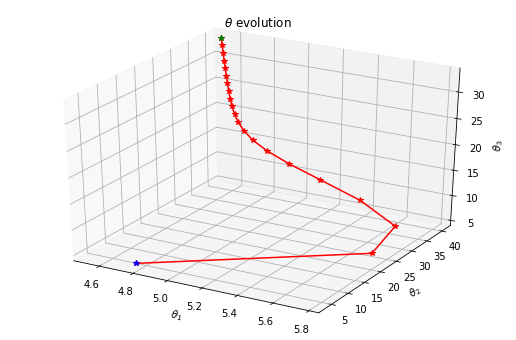

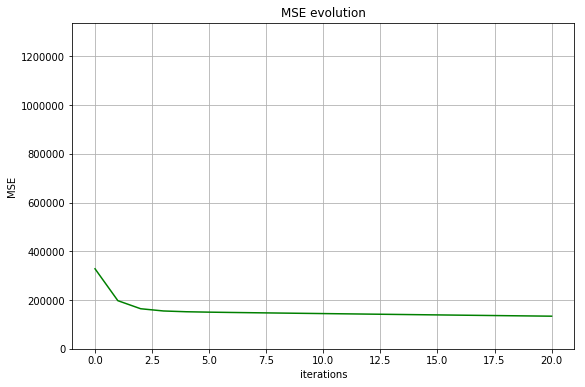

Batch gradient descent solution theta_BGD =  [[ 4.5367115 ]
 [40.24083013]
 [33.83496117]]
Final MSE =  133815.97641786354


In [209]:
num_iter = 20
mu = 1/np.mean(np.linalg.norm(x1,axis=1)**2)
print("mean of norm of x1 = ", np.mean(np.linalg.norm(x1,axis=1)) )
theta = 5*np.random.rand(3,1)
theta_evol = theta
mse_evol = np.array(mean_squared_error(y1,x1,theta))
for count in range(num_iter):
  grad_theta = -1*np.matmul(x1.T,(y1-np.matmul(x1,theta)))/num_samples
  theta1 = theta- mu*grad_theta
  # print(theta, grad_theta,theta1)
  theta = theta1
  
  theta_evol = np.concatenate((theta_evol,theta1),axis=1)
  mse_evol = np.append(mse_evol,mean_squared_error(y1,x1,theta))
 
plt.figure(figsize=(9,6))

ax = plt.axes(projection='3d')


ax.plot(theta_evol[0,:],theta_evol[1,:], theta_evol[2,:],'-*r')
ax.plot(theta_evol[0,0:1],theta_evol[1,0:1], theta_evol[2,0:1],'b*')
ax.plot(theta_evol[0,-1:],theta_evol[1,-1:], theta_evol[2,-1:],'g*')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$\theta_3$')
plt.title(r'$\theta$' ' evolution')
plt.show()

plt.figure(figsize=(9,6))
plt.plot(mse_evol,'-g')
plt.grid()
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.ylim((0, 10*mean_squared_error(y1,x1,theta)))
plt.title('MSE evolution')
plt.show()


print("Batch gradient descent solution theta_BGD = ", theta)
print("Final MSE = ", mean_squared_error(y1,x1,theta))

## LMS algorithm

In batch gradient descent, the gradient is computed taking into account the error with respect to all training samples. Hence, for each update to the $\theta$ we need to compute the gradient taking into account all the available samples. An advantage of batch gradient descent is that the noise in the gradient computation will be reduced due to the averaging across samples. 

An alternative to this approach is to make updates after computing the gradient with respect to each training sample. Thus we make updates at a faster rate, but using more noisy gradient computations. This approach is also popularly known as the least mean squared (LMS) algorithm. LMS algorithm was proposed by Widrow and Hoff, 1960. LMS belongs to the class of stochastic gradient descent algorithms (the basis of most machine learning algorithms). As we will observe in the examples, the LMS converges faster than batch gradient descent. An intermediate approach is to compute gradient based on a mini-batch (small subset of samples) and make updates only on mini-batch basis.

Let $e_i^2(\theta)$ denote the error in sample $i$ associated with regression coefficients $\theta$,

$$e_i^2(\theta) := (y_i - \theta^Tx_i)^2.$$

The LMS update rule is

\begin{align}
\nonumber \theta_{n+1} &= \theta_n - \mu_n \nabla_\theta(e_i^2(\theta_n))\\
 &=\theta_n + 2\mu_n x_n (y_n - \theta_n^T x_n ),
\end{align}
where $y_n$ and $x_n$ corresponds to the sample under consideration at iteration $n$. For  example, if the samples are processed in a round-robin fashion, $y_n = y_{\mod(n,N)}$, and $x_n = x_{\mod(n,N)}$. 


theta start =  [[1.96737541]
 [3.12212204]
 [2.12752785]]


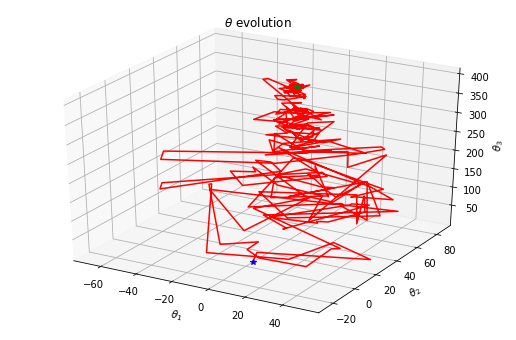

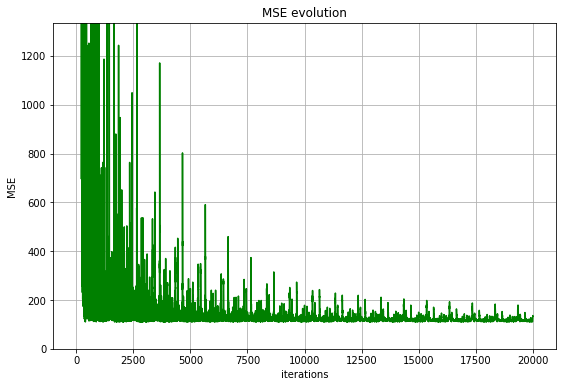

LMS solution theta_LMS =  [[  3.0584947 ]
 [ 40.46976071]
 [401.01040728]]
Final LMS MSE =  133.63695162920487


In [210]:
#LMS
# num_iter = 5
mu = 1


theta = 5*np.random.rand(3,1)
print("theta start = ", theta)
theta_evol = theta
mse_evol = np.array(mean_squared_error(y1,x1,theta))
iter_count = 1;
for count in range(num_iter):
  for count_inner in range(num_samples):
    stepsize = (mu/iter_count)
    iter_count = count+1
    grad_theta = -(y1[count_inner:count_inner+1,0] - np.matmul(x1[count_inner:count_inner+1,:],theta))
    grad_theta = x1[count_inner:count_inner+1,:].T* grad_theta/(np.linalg.norm(x1[count_inner:count_inner+1,:])**2) #normalizing the gradient with respect to x.
    #print(grad_theta)
    theta1 = theta- stepsize*grad_theta
    theta_evol = np.concatenate((theta_evol,theta1),axis=1)
    
 # print(theta, grad_theta,theta1)
    theta = theta1
    mse_evol = np.append(mse_evol,mean_squared_error(y1,x1,theta))
 
plt.figure(figsize=(9,6))

ax = plt.axes(projection='3d')

ax.plot(theta_evol[0,:],theta_evol[1,:], theta_evol[2,:],'-r')
ax.plot(theta_evol[0,0:1],theta_evol[1,0:1], theta_evol[2,0:1],'b*')
ax.plot(theta_evol[0,-1:],theta_evol[1,-1:], theta_evol[2,-1:],'g*')

plt.grid()
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$\theta_3$')
plt.title(r'$\theta$' ' evolution')
plt.show()

plt.figure(figsize=(9,6))
plt.plot(mse_evol,'-g')
plt.grid()
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.ylim((0,10*mean_squared_error(y1,x1,theta)))
plt.title('MSE evolution')
plt.show()


print("LMS solution theta_LMS = ", theta)
print("Final LMS MSE = ", mean_squared_error(y1,x1,theta))

## Linear Regression for non-linear functions

Let us assume a function of the form $y = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1x_2+ \theta_4 x_1^2$. Can we use linear regression to estimate this functional? Yes, we can use linear regression as the funcational is still a linear combination of the different features, the features in the above case turns out to be $\{x_1, x_2, x_1x_2, x_1^2\}.$

In [211]:
#Let x2 denote the feature vector.
feature_x2 = np.concatenate((x[:,0:1],x[:,1:2],np.multiply(x[:,0:1],x[:,1:2]),np.multiply(x[:,0:1],x[:,0:1]),np.ones((x[:,0:1].size,1))),axis=1) #columns of x2 are[x1, x2, x1x2, x1^2,1]
true_theta2 = 10*np.random.randn(5,1)
output_y2 = np.matmul(feature_x2,true_theta2) + math.sqrt(noise_var)*np.random.randn(x[:,0:1].size,1)


#LS solution
theta2_LS = np.matmul(np.linalg.pinv(feature_x2),output_y2)
print("True theta = ", true_theta2)
print("Theta LS = ", theta2_LS)

True theta =  [[  2.02345462]
 [ -9.4580557 ]
 [-12.46509008]
 [  1.40762372]
 [ -7.68475947]]
Theta LS =  [[  2.00107669]
 [ -9.45531302]
 [-12.46228743]
 [  1.40910102]
 [ -7.74889856]]


theta start =  [[0.45056058]
 [1.17974554]
 [2.46519506]
 [4.14970899]
 [4.72462403]]


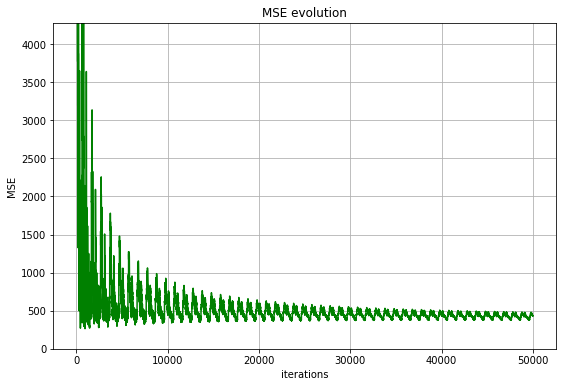

LMS solution theta_LMS =  [[  1.82224698]
 [ -9.51453711]
 [-12.41562451]
 [  1.28139882]
 [  0.42381281]]
Final LMS MSE =  428.1681227309052


In [212]:
#LMS
num_iter = 50
mu = .1


theta = 5*np.random.rand(true_theta2.size,1)
print("theta start = ", theta)
theta_evol = theta
mse_evol = np.array(mean_squared_error(output_y2,feature_x2,theta))
iter_count = 1;
for count in range(num_iter):
  for count_inner in range(num_samples):
    stepsize = (mu/iter_count)
    iter_count = count+1
    grad_theta = -(output_y2[count_inner:count_inner+1,0] - np.matmul(feature_x2[count_inner:count_inner+1,:],theta))
    grad_theta = feature_x2[count_inner:count_inner+1,:].T* grad_theta/(np.linalg.norm(feature_x2[count_inner:count_inner+1,:])**2) #normalizing the gradient with respect to x.
    #print(grad_theta)
    theta1 = theta- stepsize*grad_theta
    theta_evol = np.concatenate((theta_evol,theta1),axis=1)
    
 # print(theta, grad_theta,theta1)
    theta = theta1
    mse_evol = np.append(mse_evol,mean_squared_error(output_y2,feature_x2,theta))
 
#plt.figure(figsize=(9,6))

# ax = plt.axes(projection='3d')

# ax.plot(theta_evol[0,:],theta_evol[1,:], theta_evol[2,:],'-r')
# ax.plot(theta_evol[0,0:1],theta_evol[1,0:1], theta_evol[2,0:1],'b*')
# ax.plot(theta_evol[0,-1:],theta_evol[1,-1:], theta_evol[2,-1:],'g*')

# plt.grid()
# ax.set_xlabel(r'$\theta_1$')
# ax.set_ylabel(r'$\theta_2$')
# ax.set_zlabel(r'$\theta_3$')
# plt.title(r'$\theta$' ' evolution')
# plt.show()

plt.figure(figsize=(9,6))
plt.plot(mse_evol,'-g')
plt.grid()

plt.xlabel('iterations')
plt.ylabel('MSE')
plt.ylim((0,10*mean_squared_error(output_y2,feature_x2,theta)))
plt.title('MSE evolution')
plt.show()


print("LMS solution theta_LMS = ", theta)
print("Final LMS MSE = ", mean_squared_error(output_y2,feature_x2,theta))

##Underfitting, Overfitting and Regularization

When the number of parameters in the regression analysis are less than what is actually required, regression does not have the flexibility to actually learn the true function. On the other hand, when the number of parameters to be tuned are larger than what is actually required, there is a risk that the regression algorithm would try to closely fit the available sample points. The first scenario results in underfitting, while the second scenario results in overfitting. In the example below, we show the least squares regression for a quadratic function with different feature sets. When we restrict the regression function to polynomials of degree one, we observe underfitting. Whereas, when we allow the regression functions to be polynomials of degree greater than two, we observe overfitting. 

###Regularization 

Regularization is a technique to reduce over fitting. Regularization imposes a penalty on the regression coefficients and hence tries to drive down un-necessary coefficients. 

Linear regression with $L_2$ regularization is also known as Ridge regression. In Ridge regression, the cost function is of the form
$$L(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i-\theta^Tx_i)^2+ \lambda \Vert \theta \Vert_2^2,$$
where $\lambda$ is known as the regularization parameter. 

Similarly, one could do regression with $L_1$ regularization, and such a regression is also known as Lasso regression. In Lasso, the cost function is of the form

$$L(\theta) =  \frac{1}{2N}\sum_{i=1}^N (y_i-\theta^Tx_i)^2 + \lambda \Vert \theta \Vert_1,$$
where $\lambda$ is known as the regularization parameter. 

True theta =  [[0 5 1 1]]
LS_1 =  [[1.72505778 2.63457799]]
LS_2 =  [[4.03299384 0.83352824 1.30656981]]
LS_3 =  [[-1.41103312  4.20361139  1.689639    1.32977065]]
LS_4 =  [[ 9.43912705 -4.35206946 -3.07928786  3.01841257  1.9433657 ]]
LS_5 =  [[ 4.50049308  7.32644548 -8.44988661 -1.79521827  3.72470489  1.91110702]]


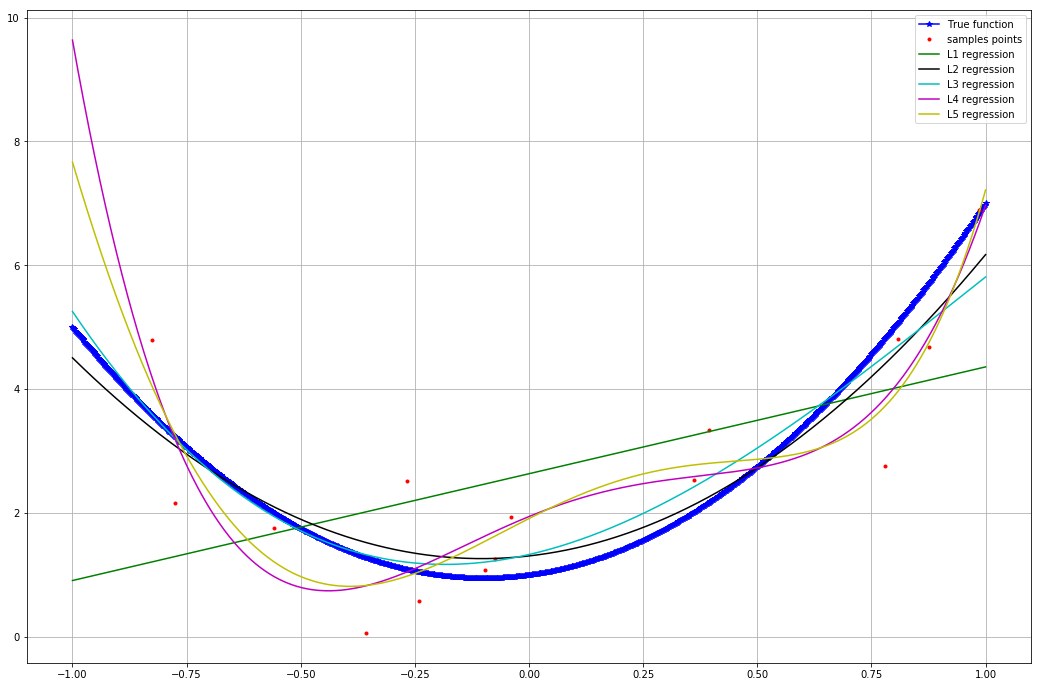

In [232]:
x = np.array([np.linspace(-1,1,1000)]).T

theta_true = np.array([[0, 5, 1, 1]]).T
y = theta_true[0,0]*(x)**3 + theta_true[1,0]*(x)**2+ theta_true[2,0]*x+ theta_true[3,0]

#print("x shape = ",x.shape)
#print("y shape = ",y.shape)

num_samples = 15
noise_var = 1
x_points = 2*np.random.rand(num_samples,1)-1;
y_noisy = theta_true[0,0]*(x_points)**3 + theta_true[1,0]*(x_points)**2+theta_true[2,0]*x_points+ theta_true[3,0] + math.sqrt(noise_var)*np.random.randn(x_points.size,1);

X1_points = np.concatenate((x_points,np.ones((x_points.size,1))),axis=1)
X2_points = np.concatenate((x_points**2,x_points,np.ones((x_points.size,1))),axis=1)
X3_points = np.concatenate((x_points**3,x_points**2,x_points,np.ones((x_points.size,1))),axis=1)
X4_points = np.concatenate((x_points**4,x_points**3,x_points**2,x_points,np.ones((x_points.size,1))),axis=1)
X5_points = np.concatenate((x_points**5,x_points**4,x_points**3,x_points**2,x_points,np.ones((x_points.size,1))),axis=1)

LS_1 = np.matmul(np.linalg.pinv(X1_points),y_noisy)
LS_2 = np.matmul(np.linalg.pinv(X2_points),y_noisy)
LS_3 = np.matmul(np.linalg.pinv(X3_points),y_noisy)
LS_4 = np.matmul(np.linalg.pinv(X4_points),y_noisy)
LS_5 = np.matmul(np.linalg.pinv(X5_points),y_noisy)

print("True theta = ", theta_true.T)
print("LS_1 = ", LS_1.T)
print("LS_2 = ", LS_2.T)
print("LS_3 = ", LS_3.T)
print("LS_4 = ", LS_4.T)
print("LS_5 = ", LS_5.T)

X1 = np.concatenate((x,np.ones((x.size,1))),axis=1)
X2 = np.concatenate((x**2,x,np.ones((x.size,1))),axis=1)
X3 = np.concatenate((x**3,x**2,x,np.ones((x.size,1))),axis=1)
X4 = np.concatenate((x**4,x**3,x**2,x,np.ones((x.size,1))),axis=1)
X5 = np.concatenate((x**5,x**4,x**3,x**2,x,np.ones((x.size,1))),axis=1)

Y1 = np.matmul(X1,LS_1)
Y2 = np.matmul(X2,LS_2)
Y3 = np.matmul(X3,LS_3)
Y4 = np.matmul(X4,LS_4)
Y5 = np.matmul(X5,LS_5)



plt.figure(figsize=(18,12))
plt.plot(x,y,'-*b')
plt.plot(x_points,y_noisy,'.r')

plt.plot(x,Y1,'-g')
plt.plot(x,Y2,'-k')
plt.plot(x,Y3,'-c')
plt.plot(x,Y4,'-m')
plt.plot(x,Y5,'-y')
plt.legend(('True function', 'samples points', 'L1 regression', 'L2 regression', 'L3 regression', 'L4 regression', 'L5 regression'))
plt.grid(True)
plt.show()

True theta =  [[0 5 1 1]]
L1_Ridge =  [1.44950754 2.55242215]
L2_Ridge =  [3.51442033 0.67262757 1.39517201]
L3_Ridge =  [0.         3.51450218 0.67261302 1.39514483]
L4_Ridge =  [0.33659357 0.         3.24162859 0.6564511  1.41546319]
L5_Ridge =  [0.         0.33665693 0.         3.24157692 0.6564481  1.41546711]


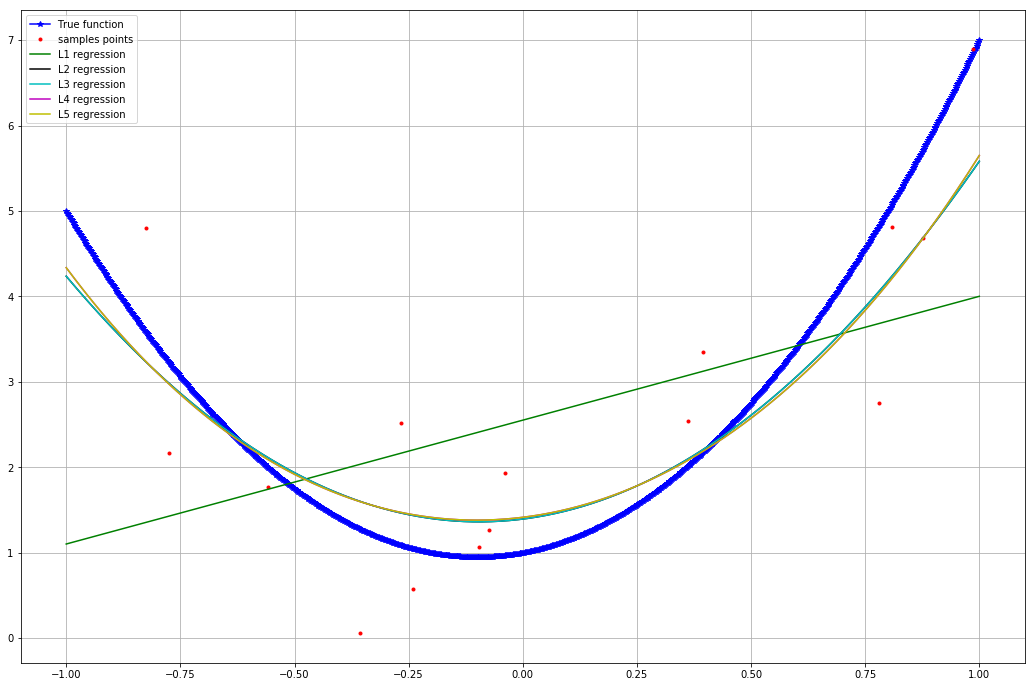

In [234]:
##Regularization
## Ridge, Lasso

from sklearn.linear_model import Ridge, Lasso
lambda_regularization = .1

reg = Lasso(alpha=lambda_regularization,fit_intercept=False)


reg.fit(X1_points,y_noisy)
L1_Ridge = reg.coef_

reg.fit(X2_points,y_noisy)
L2_Ridge = reg.coef_

reg.fit(X3_points,y_noisy)
L3_Ridge = reg.coef_

reg.fit(X4_points,y_noisy)
L4_Ridge = reg.coef_

reg.fit(X5_points,y_noisy)
L5_Ridge = reg.coef_

print("True theta = ", theta_true.T)
print("L1_Ridge = ", L1_Ridge)
print("L2_Ridge = ", L2_Ridge)
print("L3_Ridge = ", L3_Ridge)
print("L4_Ridge = ", L4_Ridge)
print("L5_Ridge = ", L5_Ridge)

Y1_Ridge = np.matmul(X1,L1_Ridge.T)
Y2_Ridge = np.matmul(X2,L2_Ridge.T)
Y3_Ridge = np.matmul(X3,L3_Ridge.T)
Y4_Ridge = np.matmul(X4,L4_Ridge.T)
Y5_Ridge = np.matmul(X5,L5_Ridge.T)



plt.figure(figsize=(18,12))
plt.plot(x,y,'-*b')
plt.plot(x_points,y_noisy,'.r')

plt.plot(x,Y1_Ridge,'-g')
plt.plot(x,Y2_Ridge,'-k')
plt.plot(x,Y3_Ridge,'-c')
plt.plot(x,Y4_Ridge,'-m')
plt.plot(x,Y5_Ridge,'-y')
plt.legend(('True function', 'samples points', 'L1 regression', 'L2 regression', 'L3 regression', 'L4 regression', 'L5 regression'))
plt.grid(True)
plt.show()


##Extras
Exercises:

*  Impact of stepsize on convergence
*  How does a linear transformation of the independent variables affect performance
* Need for regularization
* Implement line search for faster convergence



In [0]:
# #Observation as a linear trasformation
# A = np.array([[1.0,1.0], [1.0,0.0]])
# #A = np.array([[1.0,0.0], [0.0,1.0]])
# print("A = ", A, ". theta = ", theta, ". inv(A)*theta = ", np.matmul(np.linalg.inv(A),theta[0:2,:]))

# x1 = np.concatenate((np.matmul(x,A.T), np.ones((num_samples,1),dtype=x.dtype)), axis=1) #append all ones column to x


# #Noisy observation of independent variables
# #x2 = x+np.random.randn(num_samples,2)*2
# #x1 = np.concatenate((x2, np.ones((num_samples,1),dtype=x.dtype)), axis=1) #append all ones column to x